In [41]:
import numpy as np 
import pandas as pd

In [42]:
df = pd.read_csv(r"C:\Excellence\used_cars_data_1.csv")
df

,Brand,Model,Year,Kilometer Driven (km),Fuel Type,Transmission Type,Location,Price (INR)
0,Hyundai,Elantra,2007,53266,Petrol,Automatic,New Delhi,462010.10
1,Toyota,Corolla,2005,126939,Electric,Automatic,Mumbai,180959.15
2,Mercedes,S-Class,2011,176820,Electric,Manual,New Delhi,9293477.00
3,Tata,Altroz,2003,106196,Diesel,Manual,Mumbai,50000.00
4,Honda,Civic,2024,189674,Electric,Manual,Mumbai,700000.00
...,...,...,...,...,...,...,...,...
9995,Nissan,Magnite,2001,183698,Petrol,Manual,Chennai,50000.00
9996,Honda,Jazz,2003,97699,Diesel,Manual,Chennai,50000.00
9997,BMW,3 Series,2022,26727,Electric,Automatic,Ahmedabad,3845990.95
9998,Ford,Endeavour,2020,134439,Petrol,Automatic,New Delhi,2729834.15


In [43]:
df.head()

,Brand,Model,Year,Kilometer Driven (km),Fuel Type,Transmission Type,Location,Price (INR)
0,Hyundai,Elantra,2007,53266,Petrol,Automatic,New Delhi,462010.10
1,Toyota,Corolla,2005,126939,Electric,Automatic,Mumbai,180959.15
2,Mercedes,S-Class,2011,176820,Electric,Manual,New Delhi,9293477.00
3,Tata,Altroz,2003,106196,Diesel,Manual,Mumbai,50000.00
4,Honda,Civic,2024,189674,Electric,Manual,Mumbai,700000.00


In [44]:
df.shape

(10000, 8)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  10000 non-null  object 
 1   Model                  10000 non-null  object 
 2   Year                   10000 non-null  int64  
 3   Kilometer Driven (km)  10000 non-null  int64  
 4   Fuel Type              10000 non-null  object 
 5   Transmission Type      10000 non-null  object 
 6   Location               10000 non-null  object 
 7   Price (INR)            10000 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [46]:
# Show rows where column kmDriven has missing values
rows_with_missing = [df['Kilometer Driven (km)'].isna()]

# Display the result
print(rows_with_missing)

[0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Kilometer Driven (km), Length: 10000, dtype: bool]


In [48]:
# Count rows where model has the value "Maruti Suzuki"
rows_count = (df['Brand'] == 'Maruti Suzuki').sum()
rows_count

1044

In [57]:
brands_to_check = ['Mercedes', 'BMW', 'Audi', 'Toyota', 'Hyundai', 'Ford', 'Tata', 'Nissan', 'Honda', 'Maruti Suzuki']
brand_counts = df[df['Brand'].isin(brands_to_check)]['Brand'].value_counts()
print(brand_counts)

Brand
Tata             1047
Maruti Suzuki    1044
Toyota           1035
BMW              1028
Ford             1025
Honda             985
Hyundai           972
Nissan            972
Mercedes          966
Audi              926
Name: count, dtype: int64


Find Categorical Data

In [58]:
unique_counts = df.nunique(dropna=False)

# Display the result
print(unique_counts)

Brand                      10
Model                      30
Year                       25
Kilometer Driven (km)    9758
Fuel Type                   4
Transmission Type           2
Location                    8
Price (INR)              7979
dtype: int64


In [59]:
# Show unique values of Brand
unique_brands = sorted(df["Brand"].unique())

# Display the result
print(unique_brands)

['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Maruti Suzuki', 'Mercedes', 'Nissan', 'Tata', 'Toyota']


In [60]:
# Show unique values of Brand
unique_models = sorted(df["Model"].unique())

# Display the result
print(unique_models)

['3 Series', 'A4', 'A6', 'Altroz', 'C-Class', 'City', 'Civic', 'Corolla', 'Creta', 'Dzire', 'E-Class', 'EcoSport', 'Elantra', 'Endeavour', 'Fiesta', 'Fortuner', 'Harrier', 'Innova', 'Jazz', 'Kicks', 'M3', 'Magnite', 'Nexon', 'Q5', 'S-Class', 'Swift', 'Terrano', 'Verna', 'Vitara Brezza', 'X5']


In [61]:
# Show unique values of Year
unique_years = sorted(df["Year"].unique())

# Display the result
print(unique_years)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


In [62]:
# Show unique values of Transmission
unique_transmissions = sorted(df["Transmission Type"].unique())

# Display the result
print(unique_transmissions)

['Automatic', 'Manual']


In [63]:
# Show unique values of FuelType
unique_fuel_types = sorted(df["Fuel Type"].unique())

# Display the result
print(unique_fuel_types)

['CNG', 'Diesel', 'Electric', 'Petrol']


In [64]:
unique_locations = sorted(df["Location"].unique())

# Display the result
print(unique_locations)

['Ahmedabad', 'Bangalore', 'Chennai', 'Hyderabad', 'Kolkata', 'Mumbai', 'New Delhi', 'Pune']


visualizations

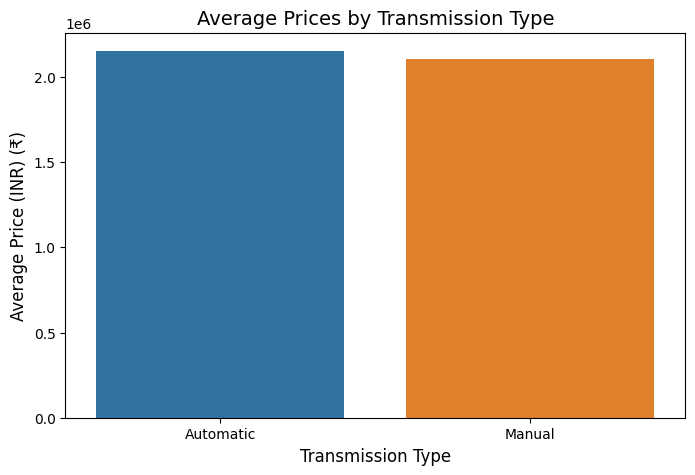

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by transmission type and calculate average price
price_trends_by_transmission = (
    df.groupby('Transmission Type')['Price (INR)']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Create a bar plot for price trends by transmission
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_trends_by_transmission, 
    x='Transmission Type', 
    y='Price (INR)', hue='Transmission Type'
)
plt.title('Average Prices by Transmission Type', fontsize=14)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Average Price (INR) (₹)', fontsize=12)

plt.show()

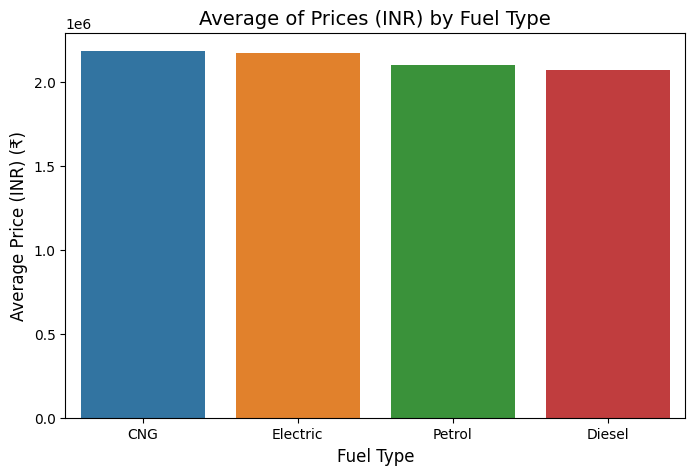

In [66]:
# Group by fuel type and calculate average price
price_trends_by_fuel_type = (
    df.groupby('Fuel Type')['Price (INR)']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Create a bar plot for price trends by fuel type
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_trends_by_fuel_type, 
    x='Fuel Type', 
    y='Price (INR)', hue='Fuel Type'
)
plt.title('Average of Prices (INR) by Fuel Type', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Average Price (INR) (₹)', fontsize=12)

plt.show()

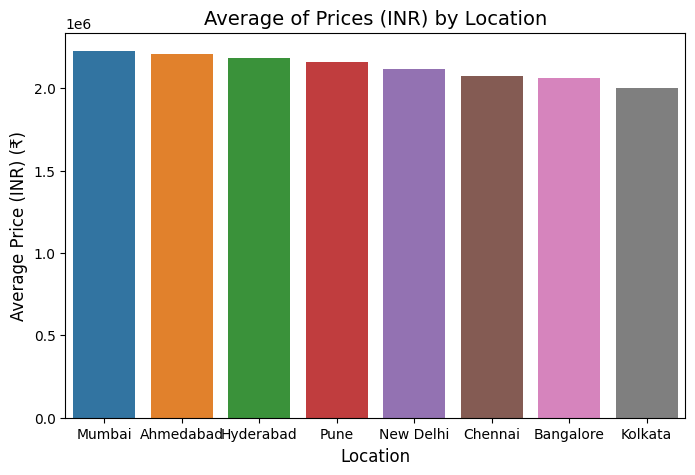

In [67]:
# Group by fuel type and calculate average price
price_trends_by_fuel_type = (
    df.groupby('Location')['Price (INR)']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Create a bar plot for price trends by fuel type
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_trends_by_fuel_type, 
    x='Location', 
    y='Price (INR)', hue='Location'
)
plt.title('Average of Prices (INR) by Location', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Price (INR) (₹)', fontsize=12)

plt.show()

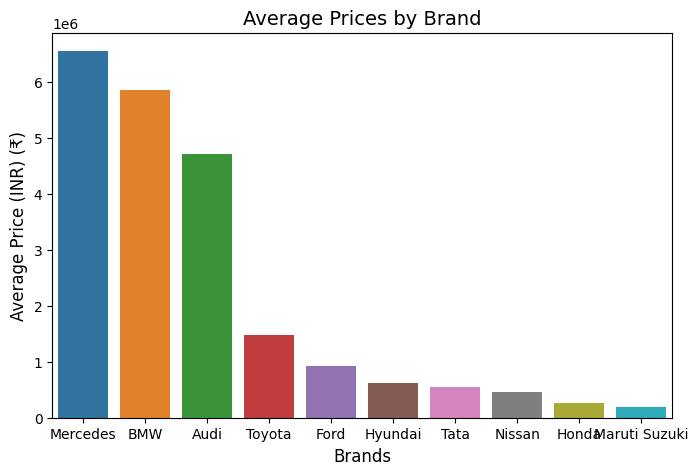

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by transmission type and calculate average price
price_trends_by_transmission = (
    df.groupby('Brand')['Price (INR)']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Create a bar plot for price trends by transmission
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_trends_by_transmission, 
    x='Brand', 
    y='Price (INR)', hue='Brand'
)
plt.title('Average Prices by Brand', fontsize=14)
plt.xlabel('Brands', fontsize=12)
plt.ylabel('Average Price (INR) (₹)', fontsize=12)

plt.show()

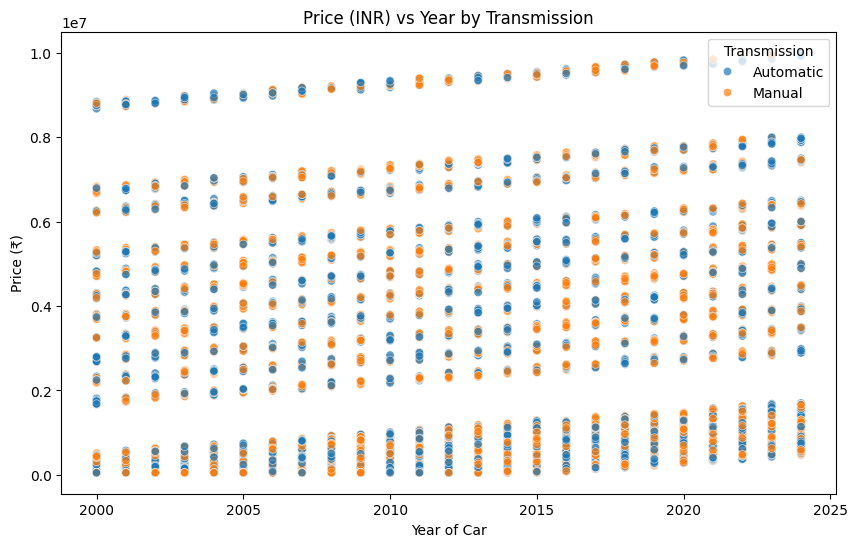

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year', y='Price (INR)', hue='Transmission Type', alpha=0.7)
plt.title('Price (INR) vs Year by Transmission')
plt.xlabel('Year of Car')
plt.ylabel('Price (₹)')
plt.legend(title='Transmission')
plt.show()

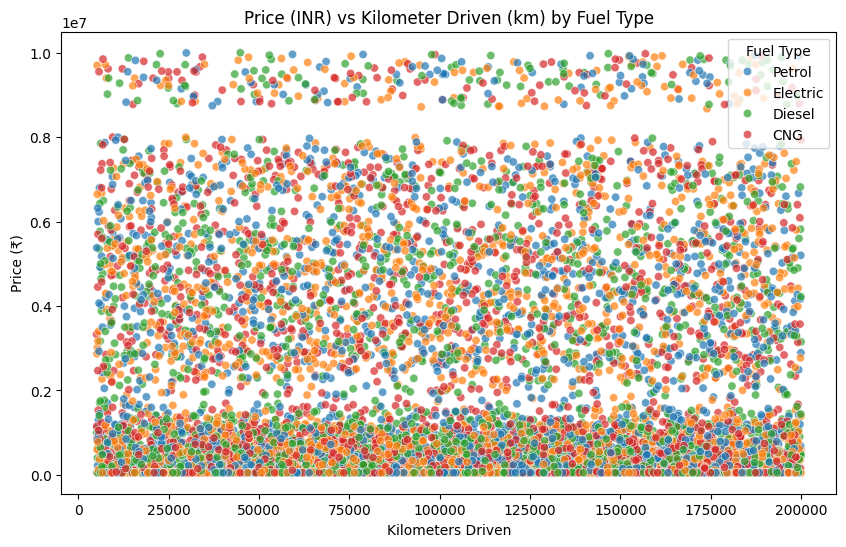

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Kilometer Driven (km)', y='Price (INR)', hue='Fuel Type', alpha=0.7)
plt.title('Price (INR) vs Kilometer Driven (km) by Fuel Type')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (₹)')
plt.legend(title='Fuel Type')
plt.show()

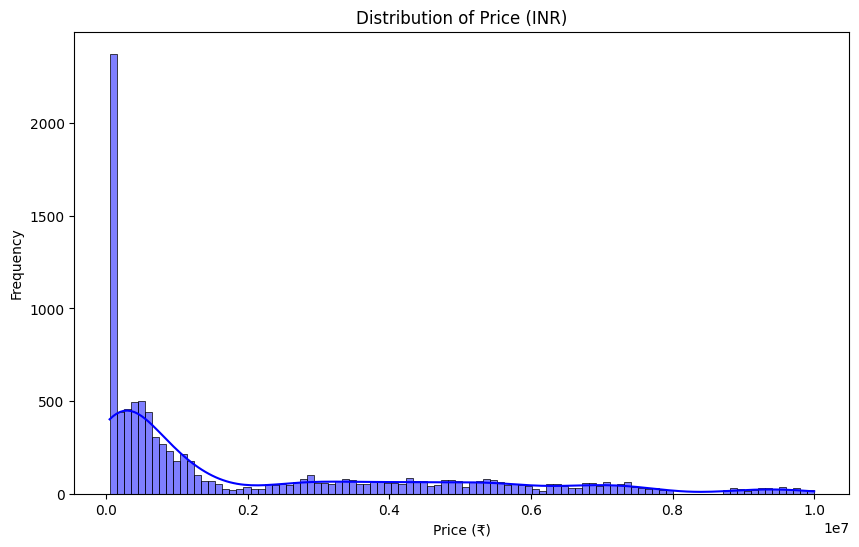

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price (INR)'], bins=100, kde=True, color='blue')
plt.title('Distribution of Price (INR)')
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.show()

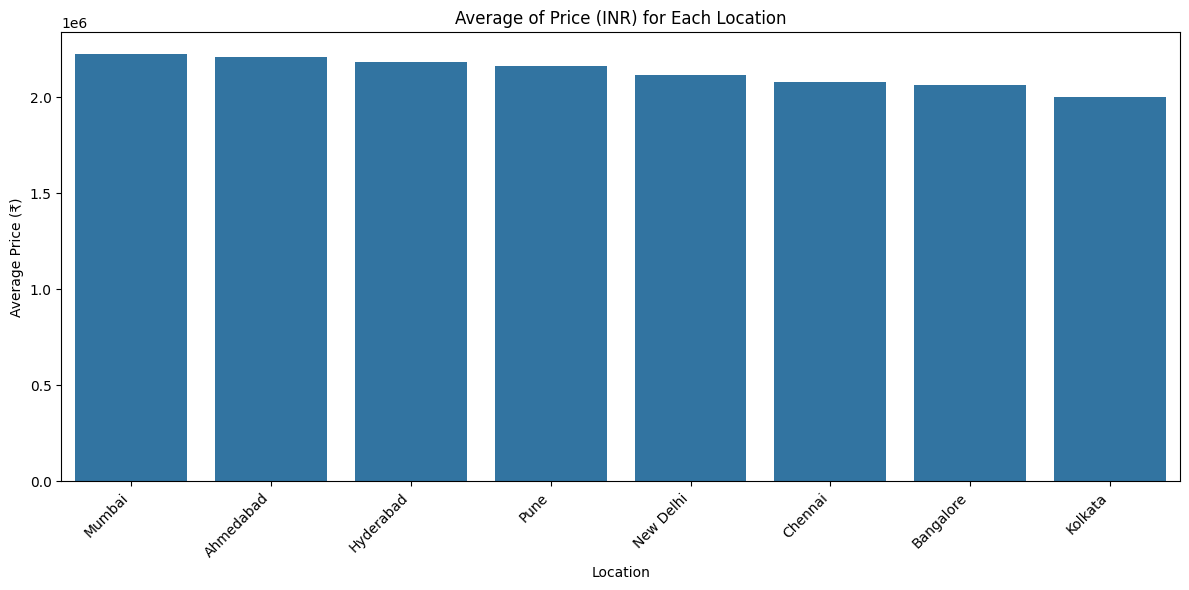

In [72]:
# Calculate the average asking price for each brand
brand_avg_price_summary = df.groupby('Location')['Price (INR)'].mean().reset_index()

# Sort the data for better visualization
brand_avg_price_summary = brand_avg_price_summary.sort_values(by='Price (INR)', ascending=False)

# Create a seaborn bar plot for the average asking price by brand
plt.figure(figsize=(12, 6))
sns.barplot(data=brand_avg_price_summary, x='Location', y='Price (INR)')
plt.title('Average of Price (INR) for Each Location')
plt.xlabel('Location')
plt.ylabel('Average Price (₹)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

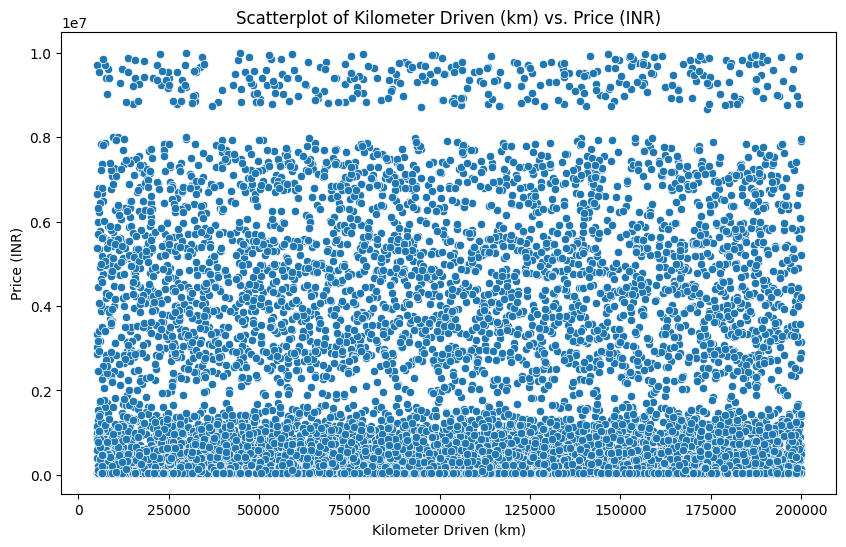

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot to identify outliers in 'kmDriven' vs. 'AskPrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Kilometer Driven (km)'], y=df['Price (INR)'])
plt.title('Scatterplot of Kilometer Driven (km) vs. Price (INR)')
plt.show()

In [74]:
from scipy.stats import zscore

# Calculate Z-Scores
df['Z-Score'] = zscore(df['Price (INR)'])

# Filter out outliers with |Z-Score| > 3
df = df[np.abs(df['Z-Score']) <= 3]

df['Z-Score']

0      -0.642131
1      -0.750336
2       2.757986
3      -0.800755
4      -0.550505
          ...   
9995   -0.800755
9996   -0.800755
9997    0.660702
9998    0.230982
9999    1.336029
Name: Z-Score, Length: 9984, dtype: float64

In [75]:
# Drop the 'Z-Score' column.
df = df.drop(columns=['Z-Score'])

In [76]:
df.shape

(9984, 8)

In [77]:
print(f'Percentage of rows dropped as Outliers: {100 * (10000 - 9984) / 10000:.2f}%')

Percentage of rows dropped as Outliers: 0.16%


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9984 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  9984 non-null   object 
 1   Model                  9984 non-null   object 
 2   Year                   9984 non-null   int64  
 3   Kilometer Driven (km)  9984 non-null   int64  
 4   Fuel Type              9984 non-null   object 
 5   Transmission Type      9984 non-null   object 
 6   Location               9984 non-null   object 
 7   Price (INR)            9984 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 702.0+ KB


In [82]:
df.to_csv('Cars24_Train_Data.csv', index=False)
print("\n✅ Data saved to 'Cars24_Train_Data.csv'")


✅ Data saved to 'Cars24_Train_Data.csv'
